<b> PRÁCTICAS DE MECÁNICA. 2º CURSO DE INGENIERÍA DE ORGANIZACIÓN INDUSTRIAL. CENTRO UNIVERSITARIO DE LA DEFENSA DE ZARAGOZA. </b> <br>
&emsp; Práctica número 2: Cinemática. Mecanismo biela-manivela-pistón. Curso 2023-24. <br>

<b> INTEGRANTES DEL GRUPO. </b> <br>
&emsp; Apellidos, nombre: <br>
&emsp; Apellidos, nombre: <br>
&emsp; Apellidos, nombre: <br>
&emsp; Grupo de clase: <br>

In [ ]:
# Importar paquetes para cálculos numéricos (numpy, sympy), representación gráfica (matplotlib) y control de tiempo de ejecución (time).
import numpy as np
from numpy import pi, sin, cos, tan, sqrt, arcsin, double, cross

import sympy as sym
from sympy import symbols, solve, Eq
sym.init_printing()

import matplotlib.pyplot as plt
#import matplotlib.animation as animation
from matplotlib import animation, rc
#from IPython.display import HTML

import time

In [ ]:
# Asegurarse de que se dispone de los paquetes necesarios para ejectuar la animación. Debería aparecer ffmpeg en la salida.

print(animation.writers.list())

<b> SISTEMA ESTUDIADO. </b> <br> <br>

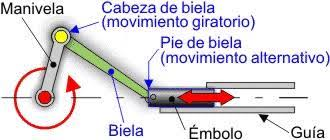

&emsp; La manivela gira en torno a un eje de giro fijo que pasa por el punto $A$ (rojo en la imagen) y enlaza con la biela en el punto $B$ (amarillo en la imagen, cabeza de biela). La biela enlaza, a su vez, con el pistón o émbolo en el punto $C$ (gris en la imagen, pie de biela). El ángulo de la manivela con un eje horizontal que pase por su eje de giro se llama $\theta$ mientras que el ángulo de la biela con un eje horizontal que pase por su cabeza se llama $\phi$. <br>
&emsp; Hay que introducir la longitud de la manivela, $r$, la de la biela, $l$, y la velocidad angular, supuesta constante, de la manivela, $\omega_{AB}$. <b> Son los datos del problema.</b> <br>
&emsp; En esta práctica, se estudiará tanto la evolución de una serie de incógnitas conforme la manivela da una vuelta completa; como los puntos extremales (máximo y mínimo) dentro de cada ciclo. <br>
&emsp; El análisis se hará, en primer lugar, haciendo un barrido para distintos valores de $r$ y $l$ y, en segundo lugar, haciendo un estudio adimensional del sistema en el que se toma la longitud de la manivela, $r$, como escala de longitudes y el inverso de la velocidad angular de la manivela, $\omega_{AB}^{-1}$, como escala de tiempos. El sistema resultante sólo depende de dos parámetros: el ángulo de la manivela, $\theta$, (en radianes) y la razón de longitudes entre biela y manivela, $l/r$, (la longitud adimensional de la biela).

In [ ]:
# Parámetros globales. Introduzca los valores de r, l y wAB.
r = # Longitud de la manivela AB.
l = # Longitud de la biela BC.
wAB = # Velocidad angular de la manivela AB en radianes / segundo, calculado a partir del valor dado en rpm.
n_vueltas = 3 # Número de vueltas completas que da la manivela en cada animación.
n_puntos = 256 # Número de valores del ángulo θ considerados en cada giro completo de la manivela, 2 π.
n_cuarto = 64 # Número de valores comprendidos en un cuarto de giro de la manivela desde su posición inicial.
incremento = 2.0*pi / float(n_puntos) # Incremento del ángulo θ en radianes entre cada dos puntos considerados.

<b> POSICIONES. </b> <br>
&emsp; A continuación se calcula el valor del ángulo de la biela, $\phi$, y los vectores de posición de $B$ desde la referencia fija $A$ y de $C$ relativo a $B$: $\vec{r}_{B/A}$ y $\vec{r}_{C/B}$, respectivamente. Es decir, desde el eje de giro hasta la cabeza de la biela y desde la cabeza de la biela hasta su pie. <br>

\begin{equation}
\vec{r}_{C} = \vec{r}_A + \vec{r}_{B/A} + \vec{r}_{C/B}. \label{eq:pos} \tag{1}
\end{equation}

&emsp; En la ecuación $\eqref{eq:pos}$ se tiene que &nbsp; $\vec{r}_A = 0$ por tomarlo como origen del sistema de referencia, &nbsp; $\vec{r}_{B/A} = r \textrm{cos}(\theta) \hat{\imath} + r \textrm{sen}(\theta) \hat{\jmath}$ ($B$ desde $A$) &nbsp; y &nbsp; $\vec{r}_{C/B} = l \textrm{cos}(\phi) \hat{\imath} + l \textrm{sen}(\phi) \hat{\jmath}$ ($C$ desde $B$). Además,
como limitación impuesta por la geometría del sistema se ha de cumplir que $\vec{r}_C = x_C \hat{\imath}$. Desarrollando por componentes la ecuación $\eqref{eq:pos}$: <br>

\begin{align}
    x_C &= x_{B/A} + x_{C/B} = r \textrm{cos}(\theta) + l \textrm{cos}(\phi) \label{eq:posx} \tag{2} \\
    0 &= y_{B/A} + y_{C/B} = r \textrm{sen}(\theta) + l \textrm{sen}(\phi) \label{eq:posy}. \tag{3}
\end{align}

&emsp; Como un primer paso en el código en <i>Python</i> se crean tres vectores computacionales [<sup>1</sup>](#fn1) de alcance global: <i>theta</i>, <i>rBA</i> y <i>rCB</i> que almacenan las variables $\theta$, $\vec{r}_{B/A}$ y $\vec{r}_{C/B}$ para su uso
en el resto del cuaderno. En <i>theta</i> se almacena una distribución equiespaciada de los posibles valores del ángulo $\theta$ entre $0$ y $2 \pi n$ con $n$ el número de vueltas que da la manivela. <i>rBA</i> y <i>rCB</i> se crean con valor nulo por defecto para que, si con posterioridad no se asigna el valor que deberían tener, llame la atención la obtención de un resultado nulo.<br>

&emsp; A continuación, se define una función <i>vector_r</i> que retorna un vector con los valores de $\phi$ para cada $\theta$ y asigna a cada posición de los vectores globales <i>rBA</i> y <i>rCB</i> los valores de $\vec{r}_{B/A}$ y $\vec{r}_{C/B}$ correspondientes a cada $\theta$.<br>

\begin{align}
    \phi &= \textrm{arcsen}\Bigl(\frac{-r}{l} \textrm{sen}(\theta)\Bigr) \label{eq:phi} \tag{4} \\
    \vec{r}_{B/A} &= r \textrm{cos}(\theta) \hat{\imath} + r \textrm{sen}(\theta) \hat{\jmath} \label{eq:rba} \tag{5} \\
    \vec{r}_{C/B} &= l \textrm{cos}(\phi) \hat{\imath} + l \textrm{sen}(\phi) \hat{\jmath} \label{eq:rcb} \tag{6}
\end{align}

_____________

<span id=fn1> <font size="2"> <b> Nota 1: </b> Puesto que los vectores no son tipos básicos de <i>Python</i>, se debe emplear el paquete <i>numpy</i> donde se define la estructura de datos de tipo vector computacional para su uso en <i>Python</i>. </font> </span>

In [ ]:
# Crear vectores globales que almacenen las posiciones angulares y lineales. Se hace uso del paquete numpy.

# theta es el vector empleado en el resto del cuaderno para almacenar los valores del ángulo entre la manivela y la horizontal. 
# Va desde 0 hasta 2π. Se crean n_puntos*n_vueltas+1 posiciones equiespaciadas en el intervalo cerrado [0, n_vueltas*2.0*pi].
theta = np.linspace(0.0, 2.0*n_vueltas*pi, n_vueltas*n_puntos+1)

# rBA es la matriz empleada en el resto del cuaderno para almacenar los valores del vector de posición del punto B referido a la referencia fija A.
# Se calcula una posisción para cada valor de theta
rBA = np.zeros((len(theta), 3), dtype=double)
# rCB es la matriz empleada en el resto del cuaderno para almacenar los valores del vector de posición del punto C relativo al B.
# Se calcula una posisción para cada valor de theta
rCB = np.zeros((len(theta), 3), dtype=double)
# Las variables phi, rBA y rCB se inician con valor nulo para que se produzca un error obvio si no se inicializan correctamente con posterioridad.

# Función que calcula los vectores de posición.
# Como entrada se le pasan las longitudes de la manivela (ab) y de la biela (bc).
# Usa los valores de θ almacenados en el vector global theta.
# Sobre los vectores globales BA y rCB esta función escribe los valores de los vectores B-A y C-B.
# Retorna el vector fi que contiene los valores del ángulo de la biela respecto a la horizontal, ϕ.
def vector_r(ab,bc):
    # Se definen las variables de acceso global.
    global rBA, rCB
    # Introduce la expresión para calcular el valor de la variable fi 
    fi = 
    rBA[:,0] = ab*cos(theta)
    rBA[:,1] = ab*sin(theta)
    rCB[:,0] = bc*cos(fi)
    rCB[:,1] = -rBA[:,1]
    return fi

# Llamada a la función que calcula los vectores de posición, con los valores globales r y l como longitudes de la manivela y la biela.
phi = vector_r(r,l)

# Posiciones en el θ inicial y tras un cuarto de vuelta.
print("    Posiciones en θ = 0°")
print("r =",r,"    l =",l,"    phi =",phi[0])
print("rBA =", rBA[0,:])
print("rCB =", rCB[0,:])
print("    Posiciones en θ = 90°")
print("phi =", phi[n_cuarto])
print("rBA =", rBA[n_cuarto,:])
print("rCB =", rCB[n_cuarto,:])

<b> ANIMACIÓN DEL MECANISMO. </b> <br> 
&emsp; Se empieza creando un mallado sobre el que se ejecutará una animación del sistema en movimiento. Una vez creado, se ejecuta la animación sobre el mallado. El parámetro <i>n_vueltas</i> controla el número de vueltas completas que da la manivela durante la animación. Una
vez terminada ésta, se podría trabajar con <i>n_vueltas = 1</i> ya que, por la periodicidad de la solución, basta con estudiar un ciclo completo para analizar su funcionamiento.

In [ ]:
# Dibujar el sistema de coordenadas.
fig = plt.figure()
ax = fig.add_subplot(111, aspect='equal', autoscale_on=False, xlim=(-0.1,0.25), ylim=(-0.075,0.075))
ax.grid()
linea, = ax.plot([], [], 'o-', lw=5, color='g')

In [ ]:
# Animación de las posiciones del sistema manivela, biela y pistón.
def inicia():
    linea.set_data([], [])
    return (linea,)

def anima(i):
    estex = [0, rBA[i,0], rCB[i,0]+rBA[i,0]]
    estey = [0, rBA[i,1], rCB[i,1]+rBA[i,1]]
    
    #ax.quiver(rCB[i,0]+rBA[i,0], rCB[i,1]+rBA[i,1], vC[i,0], vC[i,1])
   
    linea.set_data(estex, estey)
    return linea,

ani = animation.FuncAnimation(fig, anima, init_func=inicia, frames=len(theta), interval=20, blit=True, repeat=False)

rc('animation', html='html5')

ani

<b>REDUCCIÓN DE ESPACIO.</b><br>
&emsp; Una vez completada la animación, basta con tener vectores que sean capaces de almacenar las posiciones de una vuelta completa. La memoria empleada y el número de cálculos se dividen por n_vueltas.

In [ ]:
# Ahorro de cálculos. En lugar de tres vueltas por el número de puntos en cada vuelta, una única vuelta. Entre 0 y n_puntos se tienen los valores correspondientes
# a la primera vuelta.
theta = theta[0:n_puntos]
phi = phi[0:n_puntos]
rBA = np.array(rBA[0:n_puntos,:])
rCB = rCB[0:n_puntos,:]

<b> VELOCIDADES. </b> <br>
&emsp; Se realiza un análisis cinemático de las velocidades del mecanismo. Puesto que se trata de un sistema plano, las velocidades angulares apuntan en la tercera dimensión, 
supuesta positiva hacia fuera del plano de trabajo (giro antihorario); mientras que para representar las velocidades lineales se tiene un vector definido sobre el plano, con la
tercera componente nula. La aplicación de la cadena cinemática de velocidades da lugar, en este mecanismo, a:

\begin{equation}
\vec{v}_C = \vec{v}_B + \vec{v}_{C/B} = \vec{v}_A + \vec{v}_{B/A} + \vec{v}_{C/B} = \vec{v}_A + \vec{\omega}_{AB} \times \vec{r}_{B/A} + \vec{\omega}_{BC} \times \vec{r}_{C/B}. \label{eq:velocidades}\tag{7}
\end{equation}

&emsp; En la ecuación $\eqref{eq:velocidades}$ se tiene que $\vec{v}_A = 0$ por ser $A$ un punto fijo y $\vec{v}_C = v_{Cx} \hat{\imath}$ como ligadura cinemática impuestas por la geometría del sistema. Además, $\vec{\omega}_{AB} = \omega_{AB} \hat{k}$ es un dato del problema y los valores de $\vec{r}_{B/A}$ y $\vec{r}_{C/B}$ son las posiciones obtenidas en las ecuaciones ([5](#mjx-eqn-eq:rba)) y ([6](#mjx-eqn-eq:rcb)). Las únicas incógnitsas a despejar son la velocidad angular de la biela, $\vec{\omega}_{BC} = \omega_{BC} \hat{k}$, y la 
componente de la velocidad lineal del pistón, $\vec{v}_C = v_{Cx} \hat{\imath}$, alineada con la corredera por la que desliza. <br>

&emsp; En el resto del cuaderno, se usarán las siguientes variables que se definen en el bloque de código que sigue como vectores de alcance global: <i>omegaAB</i> que contiene a $\omega_{AB}$, <i>omegaBC</i> que contiene a $\omega_{BC}$ y <i>vC</i> que contiene a $v_{Cx}$.<br>

&emsp; <b> Se emplean dos posibles métodos de cálculo. </b> <br>
&emsp; El <b>primero</b> consiste en descomponer la ecuación $\eqref{eq:velocidades}$ en sus dos componentes vectoriales no nulas sobre el plano ($x$ e $y$). El resultado es un sistema de dos ecuaciones y dos incógnitas: la velocidad angular de la biela y la componente horizontal de la velocidad del pistón. Se trata del método empleado en este curso al resolver problemas. <br> 

\begin{align}
v_{Cx} &= -\omega_{AB} y_{B/A} - \omega_{BC} y_{C/B} \label{eq:velcx} \tag{8} \\
0 &= \omega_{AB} x_{B/A} + \omega_{BC} x_{C/B} \label{eq:vely} \tag{9}
\end{align}
donde los valores de $(x_{B/A}, y_{B/A}, x_{C/B}, y_{C/B})$ vienen dados por las ecuaciones de posición ([2](#mjx-eqn-eq:posx)) y ([3](#mjx-eqn-eq:posy)) y deberían estar
almacenados en los vectores de alcance global <i>rBA</i> y <i>rCB</i>, antes de que se ejecute la celda de código que sigue.<br>

&emsp; El <b>segundo</b> parte de calcular la derivada temporal primera de la relación entre los ángulos $\theta$ y $\phi$ obtenida al evaluar las posiciones; la
ecuación ([3](#mjx-eqn-eq:posy)) que, por ser igual a una constante  [<sup>2</sup>](#fn2),
habrá de tener derivada temporal nula en todo instante. A partir de allí, se despeja el valor de $\dot{\phi}$, la derivada temporal primera del ángulo de la biela con la horizontal,
que, por definición, es su velocidad angular; 
del mismo modo que $\dot{\theta} = \omega_{AB}$ para la manivela. 
Conocida la velocidad angular de la biela, la aplicación de la cadena cinemática es inmediata por simple sustitución del valor conocido de $\omega_{BC}$ en la ecuación
$\eqref{eq:velcx}$. La derivada de la ecuación ([3](#mjx-eqn-eq:posy)) con respecto al tiempo da lugar a:

\begin{equation}
r \textrm{cos}(\theta) \dot{\theta} + l \textrm{cos}(\phi) \dot{\phi} = 0. \label{eq:derprang} \tag{10}
\end{equation}

&emsp; De donde se puede despejar el valor de $\omega_{BC} = \dot{\phi}$:

\begin{equation}
\omega_{BC} = \dot{\phi} = -\frac{r \textrm{cos}(\theta)}{l \textrm{cos}(\phi)} \dot{\theta} = -\frac{x_{B/A}}{x_{C/B}} \omega_{AB}
\label{eq:omegaBC} \tag{11}
\end{equation}
_________________________________________
<span id=fn1> <font size="2"> <b> Nota 2 </b> En este caso la constante es nula, pero lo relevante no es el valor que tenga; la derivada temporal de cualquier término constante es nula. </font> </span>

In [ ]:
# Crear vectores globales que almacenen las velocidades angulares y lineales.
# 
# omegaAB es el vector empleado en el resto del cuaderno para almacenar los valores de la velocidad angular de la manivela que es constante (dato).
omegaAB = np.array([0.0, 0.0, 0.0], dtype=double)
# omegaBC es el vector empleado en el resto del cuaderno para almacenar los valores de la velocidad angular de la biela.
omegaBC = np.zeros((len(theta),3), dtype=double)
# vC es la matriz empleada en el resto del cuaderno para almacenar los valores de la velocidad horizontal del pistón.
vC = np.zeros((len(theta),3), dtype=double)
# Las variables omegaAB, omegaBC y vC se inician con valor nulo para que se produzca un error obvio si no se inicializan correctamente con posterioridad.

def vector_v1():
    global omegaAB, omegaBC, vC
    # Velocidad angular de la barra AB.
    omegaAB[2] = wAB
    # Se definen las variables empleadas como incógnitas.
    wBCZ,vCX = symbols('wBCZ,vCX')
    wBC = np.array([0.0, 0.0, wBCZ]) # wBCZ es una incógnita.

    # Se asignan valores a un sistema de dos ecuaciones con dos incógnitas, para cada posición angular, cuya solución es la velocidad angular de la barra BC y la
    # velocidad lineal del pistón vC. Cadena cinemática partiendo de A punto fijo.
    for n in range(len(theta)):
        # Introduce la expresión para calcular los valores de vB y vCB, a partir de la Ec. 7 de este cuaderno.
        # Ten cuidado: omegaAB y wBC son vectores de dimensión (3); en cambio rBA y rCB son vectores de dimensión (n_puntos,3); de allí
        # la necesidad de hacer un barrido para todos los posibles valores de n_puntos.
        vB =  # Velocidad absoluta del punto B
        vCB = # Velocidad relativa del punto C con respecto a B
        eqx = Eq(vB[0]+vCB[0], vCX) # Examine cómo se representan las ecuaciones de la velocidad porque, con las de aceleración, las tendrá que representar usted.
        eqy = Eq(vB[1]+vCB[1], vC[n,1])
        sol = solve([eqx,eqy], (wBCZ,vCX))
        # Una vez resuelta la ecuación, sus soluciones se introducen en las componentes vectoriales correspondientes.
        omegaBC[n,2] = sol[wBCZ]
        vC[n,0] = sol[vCX]
        
def vector_v2():
    global omegaAB, omegaBC, vC
    # Velocidad angular de la barra AB.
    omegaAB[2] = wAB
    # Se calcula del valor que debe tener la velocidad angular de la biela, derivando una vez con respecto al tiempo la ligadura de posiciones.
    omegaBC[:,2] = -(rBA[:,0]/rCB[:,0]) * wAB
    vC[:,0] = -omegaAB[2]*rBA[:,1] - omegaBC[:,2]*rCB[:,1]
    vC[:,1] = 0.0

<b>ACELERACIONES.</b> <br>
&emsp; En el siguiente paso, se realiza un análisis cinemático de las aceleraciones del mecanismo. Puesto que se trata de un sistema plano, 
las aceleraciones angulares apuntan en la tercera dimensión, 
supuesta positiva hacia fuera del plano de trabajo (giro antihorario); mientras que para representar las aceleraciones lineales se tiene un vector definido sobre el plano, con la
tercera componente nula. La aplicación de la cadena cinemática de aceleraciones da lugar, en este mecanismo, a:<br>

\begin{equation}
\vec{a}_C = \vec{a}_B + \vec{a}_{C/B} = \vec{a}_A + \vec{\alpha}_{AB} \times \vec{r}_{B/A} + \vec{\omega}_{AB} \times (\vec{\omega}_{AB} \times \vec{r}_{B/A}) + \vec{\alpha}_{BC} \times \vec{r}_{C/B} + \vec{\omega}_{BC} \times (\vec{\omega}_{BC} \times \vec{r}_{C/B}).
\label{eq:aceleraciones} \tag{12}
\end{equation}

&emsp; En la ecuación $\eqref{eq:aceleraciones}$, se cumple que $\vec{a}_A = 0$ por ser $A$ un punto fijo y $\vec{a}_C = a_{Cx} \hat{\imath}$ como ligadura cinemática impuesta
por la geometría del sistema. Además, $\vec{\omega}_{AB} = \omega_{AB} \hat{k}$ y $\vec{\alpha}_{AB} = 0$ como datos dados en el enunciado (la manivela gira con velocidad angular constante $\omega_{AB}$). Los valores de $\vec{r}_{B/A}$ y $\vec{r}_{C/B}$ son las posiciones obtenidas en las ecuaciones ([5](#mjx-eqn-eq:rba)) y ([6](#mjx-eqn-eq:rcb)); por su parte el valor de $\omega_{BC}$ es la velocidad angular de la biela despejada como incógnita en el estudio cinemático de velocidades. Las únicas incógnitas a despejar son la aceleración angular de la biela, $\vec{\alpha}_{BC} = \alpha_{BC} \hat{k}$, y la 
componente de la aceleración lineal del pistón, $\vec{a}_C = a_{Cx} \hat{\imath}$, alineada con la corredera por la que desliza. <br>

&emsp; En el resto del cuaderno, se usarán las siguientes variables que se definen en el bloque de código que sigue como vectores de alcance global: <i>alphaBC</i> que contiene a $\alpha_{BC}$ y <i>aC</i> que contiene a $a_{Cx}$.<br>

&emsp; <b> Se emplean dos posibles métodos de cálculo. </b> <br>
&emsp; El <b>primero</b> consiste en descomponer la ecuación $\eqref{eq:aceleraciones}$ en sus dos componentes vectoriales no nulas sobre el plano ($x$ e $y$). El resultado es un sistema de dos ecuaciones y dos incógnitas: la aceleración angular de la biela y la componente horizontal de la aceleración del pistón. Se trata del método empleado en este curso al resolver problemas. Nótese que es necesario haber calculado previamente las velocidades angulares para poder emplear como datos conocidos las aceleraciones centrípetas
que intervengan en el sistema. <br>

\begin{align}
a_{Cx} &= -\omega_{AB}^2 x_{B/A} - \omega_{BC}^2 x_{C/B} -\alpha_{BC} y_{C/B}  \label{eq:acx} \tag{13} \\
0 &= -\omega_{AB}^2 y_{B/A} - \omega_{BC}^2 y_{C/B} + \alpha_{BC} x_{C/B} \label{eq:acy} \tag{14}
\end{align}
donde los valores de $(x_{B/A}, y_{B/A}, x_{C/B}, y_{C/B})$ deberían estar
almacenados en los vectores de alcance global <i>rBA</i> y <i>rCB</i>; por su parte los valores
de $\omega_{AB}$ y $\omega_{BC}$ deberían estar almacenados en los vectores de alcance global <i>omegaAB</i> y <i>omewgaBC</i>. <br>

&emsp; El <b>segundo</b> parte de calcular la derivada temporal segunda de la relación entre los ángulos $\theta$ y $\phi$ obtenida al evaluar las posiciones. Puesto que, en el cálculo de velocidades ya se evaluó la derivada temporal primera, bastaría con derivar una vez más la expresión  ([10](#mjx-eqn-eq:derprang)). 
A partir de allí, se despeja el valor de la derivada temporal segunda de $\phi$ (es necesario haber calculado previamente la derivada temporal primera para poder despejarla) que es la aceleración angular de la biela por definición. Conocida la aceleración angular de la biela, la aplicación de la cadena cinemática es inmediata por simple sustitución del valor conocido de $\alpha_{BC}$ en la ecuación $\eqref{eq:acx}$. La derivada de la ecuación ([10](#mxj-eqn-eq:derprang)) con respecto al tiempo da lugar a:


\begin{equation}
-r \textrm{sen}(\theta) \dot{\theta}^2 + r \textrm{cos}(\theta) \ddot{\theta} - l \textrm{sen}(\phi) \dot{\phi}^2 + l \textrm{cos}(\phi) \ddot{\phi} = 0.
\label{eq:dersgang} \tag{15}
\end{equation}

&emsp; De donde se puede despejar el valor de $\alpha_{BC} = \ddot{\phi}$, sabiendo que $\ddot{\theta} = \alpha_{AB} = 0$ y $\dot{\theta} = \omega_{AB}$ por los datos del problema y que $\dot{\phi} = \omega_{BC}$ por los resultados previos obtenidos en el cálculo de velocidades, ecuación ([11](#mjx-eqn-eq:omega_BC)).

\begin{equation}
\alpha_{BC} = \ddot{\phi} = \textrm{tg}(\phi)  \dot{\phi}^2 + \frac{r \textrm{sen}(\theta) \dot{\theta}^2}{l \textrm{cos}(\phi)} = \textrm{tg}(\phi) (\dot{\phi}^2 - \dot{\theta}^2) =
\frac{y_{C/B}}{x_{C/B}} (\omega_{BC}^2 - \omega_{AB}^2)
\label{eq:alphaBC} \tag{16}
\end{equation}
donde se ha hecho uso de la relación entre el ángulo de la biela y de la manivela, ecuación ([3](#mjx-eqn-eq:posy)), para sustituir $r \textrm{sen}(\theta)$ por $-l \textrm{sen}(\phi)$.

In [ ]:
# Crear vectores globales que almacenen las aceleraciones angulares y lineales.
# 
# alfaBC es el vector empleado en el resto del cuaderno para almacenar los valores de la aceleración angular de la biela.
alfaBC = np.zeros((len(theta),3), dtype=double)
# aC es la matriz empleada en el resto del cuaderno para almacenar los valores de la aceleración lineal del pistón.
aC = np.zeros((len(theta),3), dtype=double)
# Las variables alfaBC y aC se inician con valor nulo para que se produzca un error obvio si no se inicializan correctamente con posterioridad.

def vector_a1():
    global alfaBC, aC
    # Se definen las variables empleadas como incógnitas.
    alBCZ,aCX = symbols('alBCZ,aCX')
    alBC = np.array([0.0, 0.0, alBCZ]) # alBCZ es una incógnita.

    # Opere de modo similar a como se hizo en el cálculo de velocidades, función vector_v1, pero adaptada al cálculo de aceleraciones.
    for n in range(len(theta)):
        # Introduce la expresión para calcular los valores de aB y aCBn, a partir de la Ec. 12 de este cuaderno.
        # Ten cuidado: omegaAB es un vector de dimensión (3); en cambio omegaBC, rBA y rCB son vectores de dimensión (n_puntos,3); de allí
        # la necesidad de hacer un barrido para todos los posibles valores de n_puntos.
        aB = #Aceleración absoluta del punto B (solo tiene componente normal)
        aCBn = #Aceleración centrípeta de c respecto de B
        aCBt = cross(alBC, rCB[n,:])
        eqx = Eq(aB[0]+aCBn[0]+aCBt[0], aCX)
        eqy = Eq(aB[1]+aCBn[1]+aCBt[1], aC[n,1])
        sol = solve([eqx,eqy],(alBCZ,aCX))
        # Una vez resuelta la ecuación, sus soluciones se introducen en las ecuaciones vectoriales correspondientes.
        alfaBC[n,2] = sol[alBCZ]
        aC[n,0] = sol[aCX]      
        
def vector_a2(angulo):
    global alfaBC, aC
    
    # Opere de modo similar a como se hizo en el cálculo de velocidades, función vector_v1, pero adaptada al cálculo de aceleraciones.
    # Se calcula del valor que debe tener la aceleración angular de la biela, derivando dos veces con respecto al tiempo la ligadura de posiciones.
    alfaBC[:,2] = #Introduzca la epxresión necesaria (véase la Ec. 16 de este cuaderno)
    # Se aplica la cadena cinemática conocidas omegaAB, omegaBC y alfaBC.
    aC[:,0] = #Introduzca la expresión necesaria (véase la Ec. 13 de este cuaderno)
    aC[:,1] = #Introduzca el valor (véase la Ec. 14 de este cuaderno)


<b>TIEMPOS DE CÁLCULO CON CADA MÉTODO.</b> <br>
&emsp; El método segundo no se ha empleado en este curso en la resolución de problemas; pero es interesante conocerlo ya que, en una aplicación computacional, los tiempos de cálculo son mucho más cortos
si no hace falta despejar ningún sistema de ecuaciones.<br>
&emsp; A continuación, se calculan los tiempos empleados por el ordenador para hacer un cálculo completo (posiciones, velocidades y aceleraciones) siguiendo cada método y
se representan un par de valores escogidos de la solución para comprobar que todo sea correcto.

In [ ]:
# Define un paso completo con el método 1.
def paso1(x,y):
    phi = vector_r(x,y)
    vector_v1()
    vector_a1()
    
# Estimación del tiempo necesario para hacer un cálculo completo de posiciones, velocidades y aceleraciones. Método 1.
inicio = time.time()
paso1(r,l)
fin = time.time()
print("Tiempo del cálculo con el primer método:", fin - inicio)

# Velocidades en el θ inicial y tras un cuarto de vuelta.
print("    Velocidades en θ = 0°")
print("vC =", vC[0,:])
print("omegaBC =", omegaBC[0,:])
print("    Velocidades en θ = 90°")
print("vC =", vC[n_cuarto,:])
print("omegaBC =", omegaBC[n_cuarto,:])
# Aceleraciones en el θ inicial y tras un cuarto de vuelta.
print("    Aceleraciones en θ = 0°")
print("aC = ", aC[0,:])
print("alfaBC =", alfaBC[0,:])
print("    Aceleraciones en θ = 90°")
print("aC = ", aC[n_cuarto,:])
print("alfaBC =", alfaBC[n_cuarto,:])

In [ ]:
# Define un paso completo con el método 2.
def paso2(x,y):
    phi = vector_r(x,y)
    vector_v2()
    vector_a2(phi)
    
# Estimación del tiempo necesario para hacer un cálculo completo de posiciones, velocidades y aceleraciones. Método 2.
inicio = time.time()
paso2(r,l)
fin = time.time()
print("Tiempo del cálculo con el segundo método:", fin - inicio)

# Velocidades en el θ inicial y tras un cuarto de vuelta.
print("    Velocidades en θ = 0°")
print("vC =", vC[0,:])
print("omegaBC =", omegaBC[0,:])
print("    Velocidades en θ = 90°")
print("vC =", vC[n_cuarto,:])
print("omegaBC =", omegaBC[n_cuarto,:])
# Aceleraciones en el θ inicial y tras un cuarto de vuelta.
print("    Aceleraciones en θ = 0°")
print("aC = ", aC[0,:])
print("alfaBC =", alfaBC[0,:])
print("    Aceleraciones en θ = 90°")
print("aC = ", aC[n_cuarto,:])
print("alfaBC =", alfaBC[n_cuarto,:])

<b>GRÁFICAS EN FUNCIÓN DEL ÁNGULO $\theta$.</b> <br>
&emsp; Para los valores de $r$, $l$ y $\omega_{AB}$ tomados del enunciado, se representa la evolución de $\phi$, $\omega_{BC}$, $v_{Cx}$, $\alpha_{BC}$ y $a_{Cx}$, en función
del ángulo de la manivela con la horizontal, $\theta$.

In [ ]:
# Velocidades y ángulo de la biela en función del ángulo de la manivela.
plt.plot(180.0*theta/pi, omegaBC[:,2], label = "wBC (rad/s)")
plt.plot(180.0*theta/pi, vC[:,0], label = "vC (m/s)")
plt.plot(180.0*theta/pi, 180.0*phi/pi, label = "phi (º)")

plt.grid()

plt.xlabel('theta (º)')

plt.legend()

plt.show()

In [ ]:
# Aceleraciones en función del ángulo de la manivela.
plt.plot(180.0*theta/pi, alfaBC[:,2], label = "alfaBC (rad/s^2)")
plt.plot(180.0*theta/pi, aC[:,0], label = "aC (m/s^2)")

plt.grid()

plt.xlabel('theta (º)')

plt.legend()

plt.show()

<b> VALORES EXTREMALES.</b><br>
&emsp; Se computan los máximos de la velocidad angular y la aceleración angular de la biela, de la velocidad lineal y de la aceleración lineal del pistón y el mínimo en valor
absoluto de la aceleración lineal del pistón.<br>
&emsp; Este estudio se hace barriendo para longitudes de la manivela, $r$, comprendidas entre 0,05 y 0,1 y longitudes de la manivela, $l$, comprendidas entre 0,11 y 0,3. 
Interesa que la longitud de la biela no sea igual que la de la manivela sino, al menos, un poco mayor. <br>
&emsp; Los resultados se representarán mediante mapas de colores en los que el eje X indica las longitudes de la biela, el eje Y las longitudes de la manivela y el color indica el valor de la variable extremal representada.

In [ ]:
# Se hace un barrido para 11 valores posibles de r y 39 de l.
n_barrido_x = 11
n_barrido_y = 39
r_valores = np.linspace(0.05, 0.1, n_barrido_x)
l_valores = np.linspace(0.11, 0.3, n_barrido_y)

# Variables donde se almacenarán los extremales. Valores iniciales nulos para que llamen la atención si no se calculan correctamente.
omegaBC_max = np.zeros((n_barrido_x, n_barrido_y), dtype=double)
alfaBC_max = np.zeros((n_barrido_x, n_barrido_y), dtype=double)
velC_max = np.zeros((n_barrido_x, n_barrido_y), dtype=double)
alC_max = np.zeros((n_barrido_x, n_barrido_y), dtype=double)
alC_min = np.zeros((n_barrido_x, n_barrido_y), dtype=double)

# Inicio del barrido sobre distintos valores de r y l.
inicio = time.time()
for i in range(len(r_valores)):
    iteracion = time.time()
    print(r_valores[i], iteracion - inicio)
    for j in range(len(l_valores)):
        # Cómputo de posiciones, velocidades y aceleraciones. Elija el método más rápido.
        # paso1(r_valores[i], l_valores[j])
        # paso2(r_valores[i], l_valores[j])
        # Cómputo de los valores extremales de entre las variables previamente obtenidas, para cada par de valores (r,l).
        omegaBC_max[i,j] = np.max(omegaBC[:,2])
        alfaBC_max[i,j] = np.max(alfaBC[:,2])
        velC_max[i,j] = np.max(vC[:,0])
        alC_max[i,j] = np.max(aC[:,0])
        alC_min[i,j] = np.abs(np.min(aC[:,0]))

fin = time.time()
print(fin - inicio)

In [ ]:
# Mapa de colores de la velocidad angular máxima de la biela, conforme varían l y r.
extent = np.min(l_valores), np.max(l_valores), np.min(r_valores), np.max(r_valores)

plt.figure(figsize=(9.6,7.2))

plt.title("wBC máximo")
plt.xlabel("l")
plt.ylabel("r")

plt.imshow(omegaBC_max, cmap=plt.cm.hsv, interpolation='bilinear', extent=extent, aspect='equal', origin='lower')

plt.colorbar(orientation="horizontal")
plt.show()

In [ ]:
# Mapa de colores de la aceleración angular máxima de la biela, conforme varían l y r.
extent = np.min(l_valores), np.max(l_valores), np.min(r_valores), np.max(r_valores)

plt.figure(figsize=(9.6,7.2))

plt.title("alfaBC máximo")
plt.xlabel("l")
plt.ylabel("r")

plt.imshow(alfaBC_max, cmap=plt.cm.hsv, interpolation='bilinear', extent=extent, aspect='equal', origin='lower')

plt.colorbar(orientation="horizontal")
plt.show()

In [ ]:
# Mapa de colores de la velocidad lineal máxima del pistón, conforme varían l y r.
extent = np.min(l_valores), np.max(l_valores), np.min(r_valores), np.max(r_valores)

plt.figure(figsize=(9.6,7.2))

plt.title("vC máximo")
plt.xlabel("l")
plt.ylabel("r")

plt.imshow(velC_max, cmap=plt.cm.hsv, interpolation='bilinear', extent=extent, aspect='equal', origin='lower')

plt.colorbar(orientation="horizontal")
plt.show()

In [ ]:
# Mapa de colores de la aceleración lineal máxima del pistón, conforme varían l y r.
extent = np.min(l_valores), np.max(l_valores), np.min(r_valores), np.max(r_valores)

plt.figure(figsize=(9.6,7.2))

plt.title("aC máximo")
plt.xlabel("l")
plt.ylabel("r")

plt.imshow(alC_max, cmap=plt.cm.hsv, interpolation='bilinear', extent=extent, aspect='equal', origin='lower')

plt.colorbar(orientation="horizontal")
plt.show()

In [ ]:
# Mapa de colores de la aceleración lineal mínima del pistón, conforme varían l y r.
extent = np.min(l_valores), np.max(l_valores), np.min(r_valores), np.max(r_valores)

plt.figure(figsize=(9.6,7.2))

plt.title("aC mínimo")
plt.xlabel("l")
plt.ylabel("r")

plt.imshow(alC_min, cmap=plt.cm.hsv, interpolation='bilinear', extent=extent, aspect='equal', origin='lower')

plt.colorbar(orientation="horizontal")
plt.show()

<b>ESTUDIO ADIMENSIONAL.</b> <br>
&emsp; En el estudio del mecanismo, los valores concretos de $r$, $l$ y $\omega_{AB}$ que se dan como datos son necesarios para obtener los resultados en unidades del sistema
internacional. <br>
&emsp; Sin embargo, para un estudio sistemático comparativo del funcionamiento del mecanismo resulta más provechoso hacer un análisis adimensional en el que lo que se investiga es el efecto de los parámetros de diseño relativo del mecanismo. <br>
&emsp; En el caso que nos ocupa, más relevante que comparar múltiples pares de valores $(r,l)$ es limitarse a considerar la variación del cociente $l/r$. Esto equivale a dividir todas las magnitudes dimensionales con unidades de longitud (posiciones, velocidades y aceleraciones lineales) por la longitud de la manivela. Es decir, trabajar como si se emplease un sistema de medida ajustado al problema en el que la unidad fuese la longitud de la manivela. En lugar de estudiar mapas en los que varían simultáneamente $r$ y $l$; basta con un análisis de una sola variable, el cociente $l/r$  que es la longitud de la biela relativa a la de la manivela, y, si interesa recuperar resultados en unidades del sistema internacional, recordar que las magnitudes en las que aparezcan longitudes deben ser multiplicadas por la longitud en metros de la manivela. <br>
&emsp; Trabajando en función del cociente $l/r$ se adimensionalizan las longitudes; pero ¿qué pasa con los tiempos?<br>
&emsp; Este problema tiene una escala de tiempos característica dada por el inverso de la velocidad angular de la manivela (recuérdese que las velocidades angulares tienen unidades de segundos a la menos uno). El modo de abstraerse de los tiempos particulares asociados a cada condición sería dividir por $\omega_{AB}$ todas las velocidades y por $\omega_{AB}^2$ todas las aceleraciones. Esto equivale a trabajar con un reloj cuya unidad de medida en vez de ser el segundo fuese $\omega_{AB}^{-1}$. De esta manera, se obtienen valores de las variables de interés de orden unidad en todos los casos y fácilmente comparables en una misma gráfica sin que la distorsión introducida por el factor de escala (habría que multiplicar las velocidades por $\omega_{AB}$ y las aceleraciones por $\omega_{AB}^2$ para recuperar valores en unidades del Sistema Internacional) camufle las oscilaciones de las variables con valores pequeños en unidades del sistema internacional frente a las que los tienen grandes. <br>
&emsp; De este modo, es más intuitivo hacerse una idea general del funcionamiento del mecanismo, comparando un menor número de gráficas y teniendo en cuenta un menor número de variables. En este mecanismo, bastaría con estudiar la dependencia con $l/r$ y $\theta$.

In [ ]:
# Análisis adimensional. Introduzca los valores adimensionales de r y wAB.
r_adim = 1.0
wAB = 1.0
n_barrido_y = 150
n_muestras = 5
l_valores = np.linspace(1.05, 8.0, n_barrido_y) # Rango extendido con respecto a lo anterior [1.1, 6.0]
omegaBC_max = np.zeros(n_barrido_y, dtype=double)
alfaBC_max = np.zeros(n_barrido_y, dtype=double)
velC_max = np.zeros(n_barrido_y, dtype=double)
alC_max = np.zeros(n_barrido_y, dtype=double)
alC_min = np.zeros(n_barrido_y, dtype=double)
# Guardar información para gráficas.
wBC_guarda = np.zeros((len(theta),n_muestras), dtype=double)
alfaBC_guarda = np.zeros((len(theta),n_muestras), dtype=double)
vC_guarda = np.zeros((len(theta),n_muestras), dtype=double)
aC_guarda = np.zeros((len(theta),n_muestras), dtype=double)

inicio = time.time()
i = 0
for j in range(len(l_valores)):
    # Elija el método más rápido.
    # paso1(r_adim,l_valores[j])
    # paso2(r_adim,l_valores[j])
    if j == 0 or j == 5 or j == 29 or j == 59 or j == (len(l_valores)-1):
        wBC_guarda[:,i] = omegaBC[:,2]
        alfaBC_guarda[:,i] = alfaBC[:,2]
        vC_guarda[:,i] = vC[:,0]
        aC_guarda[:,i] = aC[:,0]
        paso = time.time()
        print(j, l_valores[j], paso - inicio, i)
        i = i+1
    omegaBC_max[j] = np.max(omegaBC[:,2])
    alfaBC_max[j] = np.max(alfaBC[:,2])
    velC_max[j] = np.max(vC[:,0])
    alC_max[j] = np.max(aC[:,0])
    alC_min[j] = np.abs(np.min(aC[:,0]))
    
fin = time.time()
print(fin - inicio)

In [ ]:
# Funciones de dibujo de gráficas de las variables de interés en función del ángulo de la manivela.
def dibuja1():
    plt.plot(theta, wBC_guarda[:,0], label = "wBC* 1")
    plt.plot(theta, wBC_guarda[:,1], label = "wBC* 2")
    plt.plot(theta, wBC_guarda[:,2], label = "wBC* 3")
    plt.plot(theta, wBC_guarda[:,3], label = "wBC* 4")
    plt.plot(theta, wBC_guarda[:,4], label = "wBC* 5")
    plt.grid()
    plt.xlabel('theta (rad)')
    plt.legend()
    plt.show()

def dibuja2():
    plt.plot(theta, alfaBC_guarda[:,0], label = "alfaBC* 1")
    plt.plot(theta, alfaBC_guarda[:,1], label = "alfaBC* 2")
    plt.plot(theta, alfaBC_guarda[:,2], label = "alfaBC* 3")
    plt.plot(theta, alfaBC_guarda[:,3], label = "alfaBC* 4")
    plt.plot(theta, alfaBC_guarda[:,4], label = "alfaBC* 5")
    plt.grid()
    plt.xlabel('theta (rad)')
    plt.legend()
    plt.show()
    
def dibuja3():
    plt.plot(theta, vC_guarda[:,0], label = "vC* 1")
    plt.plot(theta, vC_guarda[:,1], label = "vC* 2")
    plt.plot(theta, vC_guarda[:,2], label = "vC* 3")
    plt.plot(theta, vC_guarda[:,3], label = "vC* 4")
    plt.plot(theta, vC_guarda[:,4], label = "vC* 5")
    plt.grid()
    plt.xlabel('theta (rad)')
    plt.legend()
    plt.show()

def dibuja4():
    plt.plot(theta, aC_guarda[:,0], label = "aC* 1")
    plt.plot(theta, aC_guarda[:,1], label = "aC* 2")
    plt.plot(theta, aC_guarda[:,2], label = "aC* 3")
    plt.plot(theta, aC_guarda[:,3], label = "aC* 4")
    plt.plot(theta, aC_guarda[:,4], label = "aC* 5")
    plt.grid()
    plt.xlabel('theta (rad)')
    plt.legend()
    plt.show()    
    
    
dibuja1()
dibuja2()
dibuja3()
dibuja4()

In [ ]:
# Dibujo de gráficas de extremales en función del parámetro l/r.
plt.plot(l_valores, omegaBC_max, label = "wBC*")
plt.plot(l_valores, alfaBC_max, label = "alfaBC*")
plt.plot(l_valores, velC_max, label = "vC*")
plt.plot(l_valores, alC_max, label = "aCmx*")
plt.plot(l_valores, alC_min, label = "aCmn*")
plt.grid()
plt.title("Extremales adimensionales en función del parámetro l/r")
plt.xlabel('l / r')
plt.legend()
plt.show()